# QUESTION NUMBER 4

In [ ]:
#importing pandas to create a dataframe
import pandas as pd

#importing the library numpy
import numpy as np

#reading the csv file into a dataframe
data = pd.read_csv('country-income.csv')
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
#replacing all the NaN values in the column 'Income' with its mean which is 76533.33
data['Income']= data['Income'].replace(np.nan, data['Income'].mean())
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.000000,No
1,Brazil,32.0,57600.000000,Yes
2,USA,35.0,64800.000000,No
3,Brazil,43.0,73200.000000,No
4,USA,45.0,76533.333333,Yes
5,India,40.0,69600.000000,Yes
6,Brazil,NaN,62400.000000,No
7,India,53.0,94800.000000,Yes
8,USA,55.0,99600.000000,No
9,India,42.0,80400.000000,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Using the labelencoder we transform the categorical values of the column Online Shopper to Numerical
# values where "No" corresponds to a "0" and "Yes" corresponds to "1".
data['Online Shopper Numerical'] = labelencoder.fit_transform(data['Online Shopper'])

# Using the labelencoder we transform the categorical values of the column Region to Numerical
# values where "India" corresponds to a "1", "Brazil" corresponds to "0" and "USA" corresponds to "2".
data['Region Numerical'] = labelencoder.fit_transform(data['Region'])
data

,Region,Age,Income,Online Shopper,Online Shopper Numerical,Region Numerical
0,India,49.0,86400.000000,No,0,1
1,Brazil,32.0,57600.000000,Yes,1,0
2,USA,35.0,64800.000000,No,0,2
3,Brazil,43.0,73200.000000,No,0,0
4,USA,45.0,76533.333333,Yes,1,2
5,India,40.0,69600.000000,Yes,1,1
6,Brazil,NaN,62400.000000,No,0,0
7,India,53.0,94800.000000,Yes,1,1
8,USA,55.0,99600.000000,No,0,2
9,India,42.0,80400.000000,Yes,1,1


# QUESTION NUMBER 5

In [ ]:
#importing pandas to create a dataframe
import pandas as pd

#importing the library numpy
import numpy as np

#reading the csv file into a dataframe
data = pd.read_csv('shoesize.csv')
data

,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0
2,3,F,7.0,60.0
3,4,F,8.0,60.0
4,5,F,8.0,60.0
...,...,...,...,...
403,404,M,13.0,78.0
404,405,M,13.0,78.0
405,406,M,14.0,78.0
406,407,M,15.0,80.0


In [ ]:
#importing the matplotlb library for generating plots
import matplotlib.pyplot as plt

#Defining the plot variables for size and height for each gender
plot_xf = data[data['Gender'] == 'F']['Size']
plot_xm = data[data['Gender'] == 'M']['Size']
plot_yf = data[data['Gender'] == 'F']['Height']
plot_ym = data[data['Gender'] == 'M']['Height']


In [ ]:
# importing the library pearsonr from the scipy.stats module
from scipy.stats import pearsonr

# creating a function to calculate the pearson's correlation coefficient
def pcc(data1, data2):
  coef = pearsonr(data1, data2)
  return coef


(0.7078119417143971, 9.773450790332586e-30)
The pearsons correlation coefficient for shoe size vs height for female is 0.7078119417143971


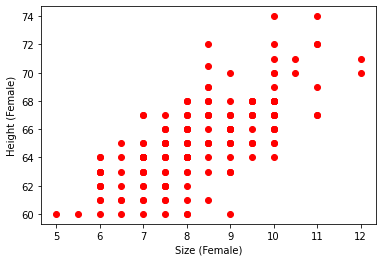

In [ ]:
#scatter plot for Size vs Height Female

plt.xlabel('Size (Female)')
plt.ylabel('Height (Female)')

#plotting both the variables and setting the dot color to red
plt.scatter(plot_xf,plot_yf, c='r')

# using the function "pcc" we created, we calculate the correlation coefficient
pcc_female = pcc(plot_xf,plot_yf)
print(pcc_female)

#the first value obtained is the correlation coefficient, hence we take the first value from the varibale pcc_female
print(f'The pearsons correlation coefficient for shoe size vs height for female is {pcc_female[0]}')

(0.7677093547300977, 3.2857111133112256e-44)
The pearsons correlation coefficient for shoe size vs height for male is 0.7677093547300977


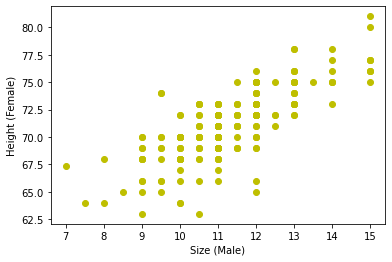

In [ ]:
#scatter plot for Size vs Height Male

plt.xlabel('Size (Male)')
plt.ylabel('Height (Female)')

#plotting both the variables and setting the dot color to yellow
plt.scatter(plot_xm,plot_ym, c='y')

# using the function "pcc" we created, we calculate the correlation coefficient
pcc_male = pcc(plot_xm,plot_ym)
print(pcc_male)

#the first value obtained is the correlation coefficient, hence we take the first value from the varibale pcc_male
print(f'The pearsons correlation coefficient for shoe size vs height for male is {pcc_male[0]}')

By looking at the scatterplots for both the genders, it can be inferred that the attribute "shoe size" and "height" are **correlated** with each other. The value of correlation (Pearson's Correlation Coefficient) in case if Female is  "**0.707**" and in case if Males is "**0.7677**". The value is slightly higher in case of Males so it means that shoe size depends on height or vice versa **more** in case if Males as compared to Females.

# QUESTION NUMBER 6

 variance ratio  [0.65445704 0.0860859 ]
          PC1       PC2  Class
0   -1.456220 -0.110210      2
1    1.466279 -0.544894      2
2   -1.579311 -0.074854      2
3    1.505247 -0.558853      2
4   -1.330551 -0.089657      2
..        ...       ...    ...
694 -1.711249  0.188019      2
695 -2.063036  0.234224      2
696  3.825359 -0.180466      4
697  2.269482 -1.113435      4
698  2.664453 -1.197242      4

[699 rows x 3 columns]


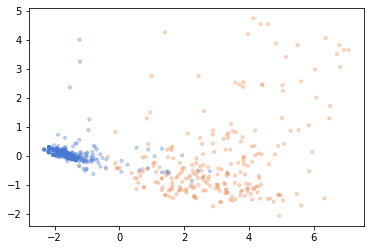

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


from sklearn.preprocessing import StandardScaler
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

from sklearn import preprocessing
from scipy import stats

data_color = data.copy()

data = data.drop(['Sample code'],axis=1)
data = data.drop(['Class'],axis=1)
data = data.replace('?', np.NaN)
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

#normalizing the data using z-score normalization

# data_norm = (data-mean) / data.std()
scalar = StandardScaler()
data_norm = scalar.fit_transform(data)



pca = PCA(n_components=2)
finaldata = pca.fit_transform(data_norm)

# variance ratio for the two components
print(" variance ratio ", pca.explained_variance_ratio_)

pca_df = pd.DataFrame(finaldata,columns=['PC1','PC2'])
pca_df['Class'] = data_color['Class']
print(pca_df)

x = pca_df['PC1']
y = pca_df['PC2']

colors = {'2':'red', '4':'green'}

# Get Unique Classes from our dataframe
color_labels = pca_df['Class'].unique()

# List of colors in the color palettes
rgb_values = sns.color_palette("muted")

# Map Class to the colors
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values to plot the scatterplot

plt.scatter(x, y, s=10, alpha=0.3,
            c= pca_df['Class'].map(color_map))
plt.show()